Accuracy: 1.0
Prediction for new passenger: Survived


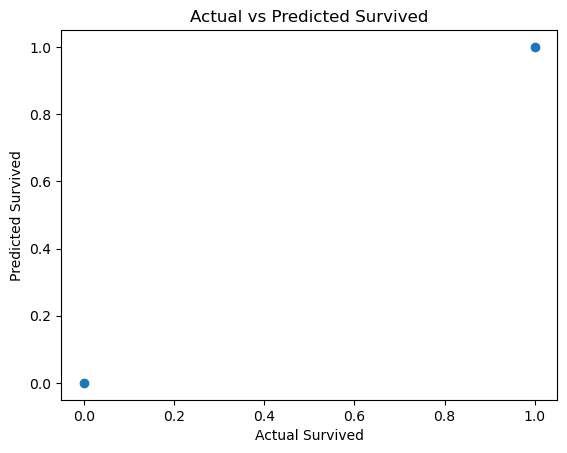

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv("titanic.csv")


data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())


data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = data[features]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

new_passenger = pd.DataFrame([[2, 1, 30, 0, 0, 10]], columns=features)
prediction = clf.predict(new_passenger)
print("Prediction for new passenger:", "Survived" if prediction[0] == 1 else "Did not survive")
plt.scatter(y_test, predictions)
plt.xlabel("Actual Survived")
plt.ylabel("Predicted Survived")
plt.title("Actual vs Predicted Survived")
plt.show()

